
Distribution of appointments across doctors:
[(201, 3), (202, 2), (203, 4), (204, 2), (205, 3), (206, 2), (207, 2), (208, 2), (209, 2), (210, 2), (211, 1), (212, 1), (213, 1), (214, 1), (215, 2)]


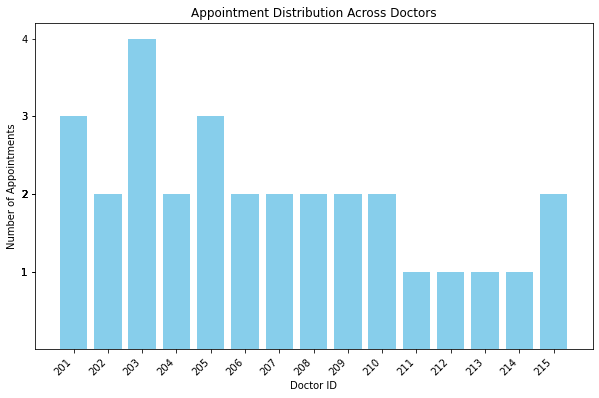

In [1]:
import mysql.connector
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="kksv2000",
    database="project_dma"
)

cursor = conn.cursor()

def execute_query(query):
    cursor.execute(query)
    data = cursor.fetchall()
    return data

#1. distribution of appointments across doctors
Q_app_count = """
SELECT DOCTOR.Doctor_ID, COUNT(APPOINTMENT.Appointment_ID) AS AppointmentCount
FROM DOCTOR
JOIN APPOINTMENT ON DOCTOR.Doctor_ID = APPOINTMENT.Doctor_ID
GROUP BY DOCTOR.Doctor_ID;
"""
app_count = execute_query(Q_app_count)
print("\nDistribution of appointments across doctors:")
print(app_count)

#bar chart showing distribution of appointments across doctors
plt.figure(figsize=(10, 6))
doctor_ids, appointment_counts = zip(*app_count)
plt.bar(doctor_ids, appointment_counts, color='skyblue')
plt.xlabel('Doctor ID')
plt.ylabel('Number of Appointments')
plt.xticks(doctor_ids)
plt.yticks(appointment_counts)
plt.title('Appointment Distribution Across Doctors')
plt.xticks(rotation=45, ha='right')
plt.show()

cursor.close()
conn.close()


Patients across different age groups:
[('31-40', 13), ('41-50', 8), ('21-30', 8), ('51-60', 1)]


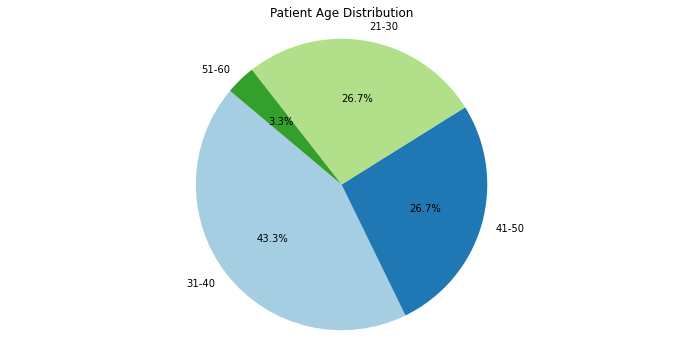

In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="kksv2000",
    database="project_dma"
)

cursor = conn.cursor()

def execute_query(query):
    cursor.execute(query)
    data = cursor.fetchall()
    return data

#2. Patients across different age groups
p_age_query = """
SELECT
    CASE
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 0 AND 10 THEN '0-10'
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 11 AND 20 THEN '11-20'
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 21 AND 30 THEN '21-30'
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 31 AND 40 THEN '31-40'
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 41 AND 50 THEN '41-50'
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 51 AND 60 THEN '51-60'
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 61 AND 70 THEN '61-70'
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 71 AND 80 THEN '71-80'
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 81 AND 90 THEN '81-90'
        WHEN FLOOR(DATEDIFF(CURDATE(), DateOfBirth) / 365) BETWEEN 91 AND 100 THEN '91-100'
        ELSE 'Unknown'
    END AS AgeGroup,
    COUNT(Patient_ID) AS PatientCount
FROM
    PATIENT
GROUP BY
    AgeGroup;
"""
p_age = execute_query(p_age_query)
print("\nPatients across different age groups:")
print(p_age)

#pie chart showing patients across different age groups
plt.figure(figsize=(12, 6))
age_groups, patient_counts = zip(*p_age)
plt.pie(patient_counts, labels=age_groups, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Patient Age Distribution')
plt.axis('equal')
plt.show()


cursor.close()
conn.close()


Age and Appointment Count:
[(33, 5), (38, 2), (41, 2), (28, 3), (45, 2), (43, 2), (31, 3), (40, 2), (25, 4), (48, 1), (30, 1), (36, 1), (27, 1), (39, 1), (37, 0), (51, 0), (35, 0), (47, 0)]


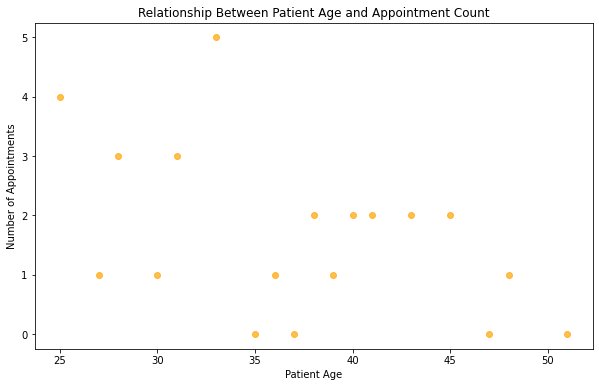

In [3]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="kksv2000",
    database="project_dma"
)

cursor = conn.cursor()

def execute_query(query):
    cursor.execute(query)
    data = cursor.fetchall()
    return data

#3. Relationship between the age of patients and the number of appointments they have
query_age_appointments = """
  SELECT 
    FLOOR(DATEDIFF(CURDATE(), P.DateOfBirth) / 365) AS Age,
    COUNT(A.Appointment_ID) AS AppointmentCount
FROM 
    PATIENT P
LEFT JOIN 
    APPOINTMENT A ON P.Patient_ID = A.Patient_ID
GROUP BY 
    Age;
"""
age_appointments_data = execute_query(query_age_appointments)
print("\nAge and Appointment Count:")
print(age_appointments_data)

#scatter plot showing relationship between the age of patients and the number of appointments they have
plt.figure(figsize=(10, 6))
ages, appointment_counts = zip(*age_appointments_data)
plt.scatter(ages, appointment_counts, color='orange', alpha=0.7)
plt.xlabel('Patient Age')
plt.ylabel('Number of Appointments')
plt.title('Relationship Between Patient Age and Appointment Count')
plt.show()


cursor.close()
conn.close()


Billing Status Distribution:
[('Paid', 8), ('Pending', 7)]


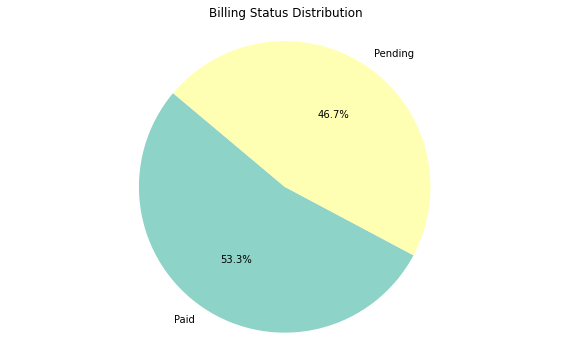

In [4]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="kksv2000",
    database="project_dma"
)

cursor = conn.cursor()

def execute_query(query):
    cursor.execute(query)
    data = cursor.fetchall()
    return data

#4. billing status
query_billing_status = """
SELECT 
    Status, 
    COUNT(Billing.Bill_ID) AS BillCount 
FROM 
    BILLING 
GROUP BY 
    Status;
"""
billing_status_data = execute_query(query_billing_status)
print("\nBilling Status Distribution:")
print(billing_status_data)

#pie chart showing bill status
plt.figure(figsize=(10, 6))
billing_statuses, bill_counts = zip(*billing_status_data)
plt.pie(bill_counts, labels=billing_statuses, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Billing Status Distribution')
plt.axis('equal')  
plt.show()

cursor.close()
conn.close()